In [19]:
from gensim.models import Word2Vec
import read_data
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [20]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.min_rows', 30)
df = read_data.create_frame()
df

,object_name,seq_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
5,COLA03,COLA03,1,8,,"[B.24.28.30, C.24.1, G.29.30.52, A.36, B.27.23...",[9]
6,COLA06,COLA06,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",[4]
7,COLA07,COLA07,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",[4]
8,COLA15,COLA15,1,2,a,"[B.29.25, B.24.25]",[4]
9,COLA29,COLA29,1,4,,"[B.31.21, B.27.30, B.31.21, B.27.30]",None


In [21]:
def sum_lists(lists):
    return [item for sublist in lists for item in sublist]

def sum_len(numbers):
    return sum(int(num) for num in numbers)

aggregation = {
    'num_of_sequences': 'first',
    'sequence_len': sum_len,
    'cycle': 'first',
    'sequence_values': sum_lists,
    'scenes': 'first'
}

In [22]:
mydf = df.groupby('object_name').agg(aggregation).reset_index()
mydf

,object_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
5,COLA03,1,8,,"[B.24.28.30, C.24.1, G.29.30.52, A.36, B.27.23...",[9]
6,COLA06,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",[4]
7,COLA07,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",[4]
8,COLA15,1,2,a,"[B.29.25, B.24.25]",[4]
9,COLA27,1,6,a,"[B.24.28, A.1.47, H.24.28, E.31.47, C.24.3, B....",None


In [23]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

def word_embedding(word, model):
    embedded = [model.wv[char] for char in word if char in model.wv]
    return sum(embedded) / len(embedded)


In [24]:

object_names = list(mydf["object_name"])
#names_lists = [[item] for item in object_names]

names_lists = [[char for char in word] for word in object_names]
print(type(names_lists[0][0]))

#model = Word2Vec(names_lists, vector_size=128, window=5, min_count=1, sg=1, hs=1)
#model = Word2Vec(names_lists, vector_size=24, min_count=1, sg=1)
model = Word2Vec(
    sentences=names_lists,
    vector_size=64,
    window=2,
    min_count=1,
    sg=1,
    sample=1e-5,
    epochs=10
)

v1 = word_embedding("BRUMC2", model)
v2 = word_embedding("BRUMC3", model)
v3 = word_embedding('TOCMAL-MA0840', model)

print(v1)

print("Cosine similarity:", cosine_similarity(v1, v2))
print("Cosine similarity:", cosine_similarity(v1, v3))


<class 'str'>
[ 1.3455392e-04 -4.0413984e-04  8.3471164e-03  4.4156536e-03
 -3.5977864e-03 -1.7657960e-03  2.7669594e-04 -5.0481386e-03
  1.3216641e-03 -6.2134587e-03  2.2062762e-03 -3.2682521e-03
 -2.8880173e-03 -3.5736365e-03 -3.6852888e-03 -1.3493813e-03
  1.6967164e-03 -3.6033031e-03 -3.8019801e-04 -8.6704874e-04
  2.9677844e-03  3.9478173e-03  3.2387655e-03  9.6002268e-04
 -1.6285324e-03  1.7289588e-03 -4.0777917e-03 -1.3005912e-04
 -2.2602996e-03 -4.2068940e-03 -6.0440097e-03  2.6873902e-03
 -5.5000157e-04  1.6667973e-03  4.9887220e-03  1.8729348e-03
  6.8585905e-03  2.5773656e-03  6.7605674e-03 -1.5142127e-03
 -2.1207302e-04  9.0654782e-04  1.0479771e-03 -3.6820031e-03
  2.8062963e-03 -5.6842598e-04  1.1235728e-03 -1.4015394e-03
 -3.2739881e-03 -5.5179033e-05  1.3274932e-03  2.6675418e-03
  1.3825664e-03  5.7784724e-04  5.6621120e-03 -2.4009764e-03
  4.9471087e-03 -1.7077524e-03 -2.2702189e-03 -3.3031069e-03
 -1.4687159e-04 -5.2117016e-03  6.9592060e-03  1.4111981e-03]
Cosine si

In [25]:
num = 100
first_names = object_names[:num]
first_vectors = [word_embedding(name, model) for name in first_names]
cosine_correlation_matrix = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        cosine_correlation_matrix[i, j] = cosine_similarity(first_vectors[i], first_vectors[j])


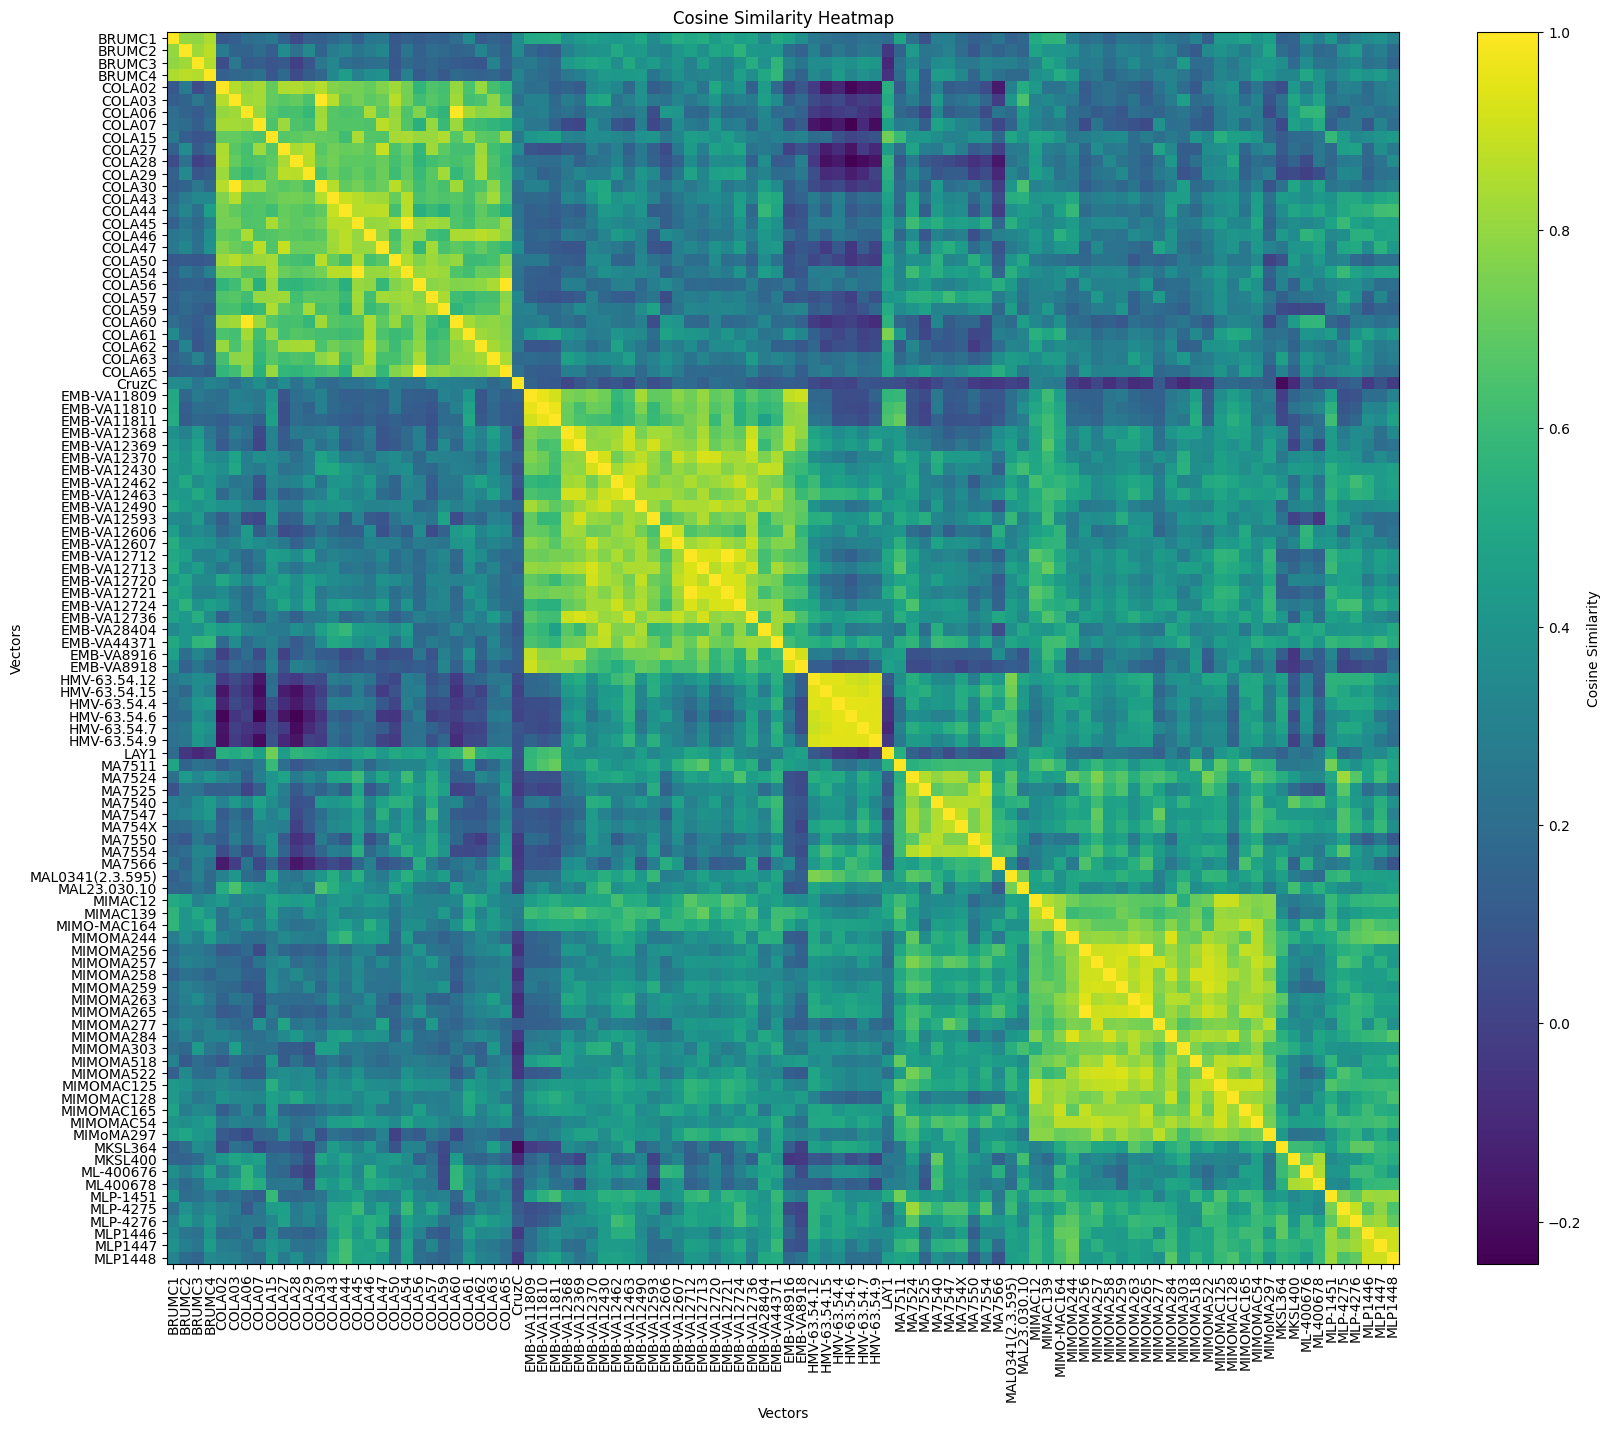

In [26]:
plt.figure(figsize=(20, 16))
plt.imshow(cosine_correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.xticks(np.arange(len(first_names)), first_names, rotation=90)
plt.yticks(np.arange(len(first_names)), first_names)
plt.show()


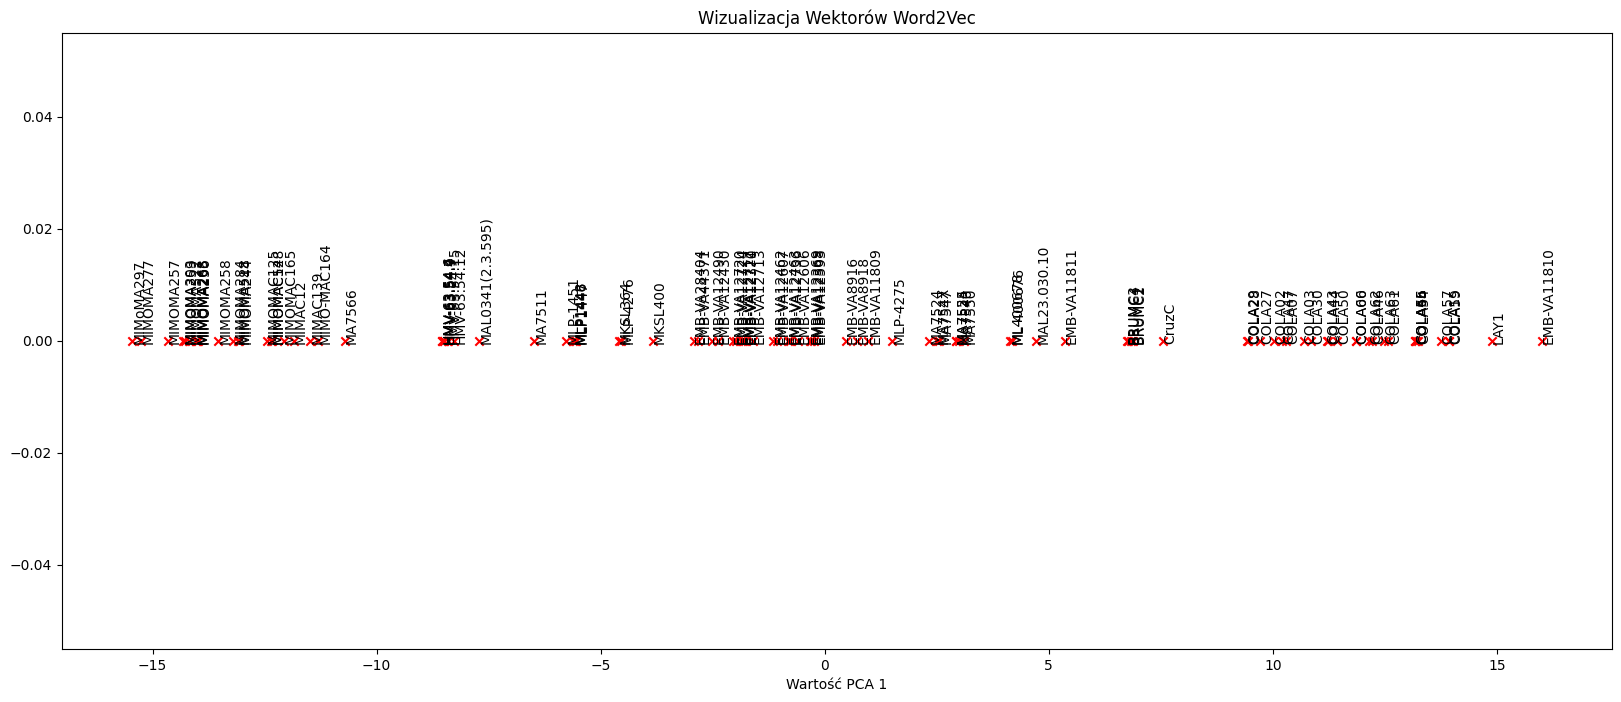

In [27]:
first_vectors = np.array(first_vectors)
tsne = TSNE(n_components=1, random_state=42, perplexity=10, n_iter=300)
one_dim_vectors = tsne.fit_transform(first_vectors)


plt.figure(figsize=(20, 8))
for i, name in enumerate(first_names):
    plt.scatter(one_dim_vectors[i], 0, marker='x', color='red')
    plt.text(one_dim_vectors[i], 0, name, fontsize=10, rotation=90)

plt.title('Wizualizacja Wektorów Word2Vec')
plt.xlabel('Wartość PCA 1')
plt.show()

In [28]:
#TODO
# to samo dla sequence values
# one hot encoding dla scenes

#KORELACJA

In [29]:
sequences = list(mydf['sequence_values'])
model2 = Word2Vec(sentences=sequences, min_count=1, window=5, vector_size=128)

def seq_embedding(seq):
    embedded = [model2.wv[sign] for sign in seq]
    return sum(embedded)/len(embedded)

In [30]:

first = sequences[0]
third = sequences[2]
thourth = sequences[3]
print(sequences)

vector1 = seq_embedding(first)
vector2 = seq_embedding(third)
vector3 = seq_embedding(thourth)

print(cosine_similarity(vector1, vector2))
print(cosine_similarity(vector3, vector2))

words = model2.wv.most_similar("B.24.11", topn=3)
print(words)


[['B.27.23.B.30', 'A.38', 'G.27.30', 'B.24.11', 'B.27.28.30.B.30', 'A.4', 'H.24.28', 'B.24.12'], ['E.17.48.3', 'B.29.23.B.25'], ['B.29.35', 'B.24.5'], ['B.24.11', 'B.29.35'], ['B.24.11', 'B.31.28', 'A.6', 'B.24.28.7', 'A.38', 'B.29.30.10', 'E.31.20', 'B.27.30'], ['B.24.28.30', 'C.24.1', 'G.29.30.52', 'A.36', 'B.27.23', 'B.24.11', 'B.29.23', 'E.17'], ['A.1.16', 'C.29', 'A.36', 'B.24.28', 'A.6', 'G.29.52', 'B.24.11', 'B.27.30', 'A.38', 'B.29.23'], ['A.1.16', 'C.29', 'A.36', 'B.24.28', 'A.6', 'G.29.52', 'B.24.11', 'B.27.30', 'A.38', 'B.29.23.B.30'], ['B.29.25', 'B.24.25'], ['B.24.28', 'A.1.47', 'H.24.28', 'E.31.47', 'C.24.3', 'B.29.30'], ['C.24.1', 'B.24.28', 'B.29.23', 'B.24.11', 'E.17.3', 'B.24.28', 'B.29.23', 'B.24.11', 'E.17.3', '0'], ['B.31.21', 'B.27.30', 'B.31.21', 'B.27.30'], ['B.24.11', 'A.36', 'B.24.11', 'A.36'], ['B.24.28.10', 'E.17.3', 'B.29.34'], ['E.17.48', 'B.29.23'], ['E.17.3', 'B.29.35'], ['B.24.11', 'B.29.23.B.25'], ['B.29.25', 'E.17.3'], ['A.1', 'B.24.11', 'B.27.30', 'B

In [31]:
num = len(object_names)
first_names = object_names[:num]
first_seq = sequences[:num]
print(first_seq)
first_embbeded = [seq_embedding(seq) for seq in first_seq]
cosine_matrix = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        cosine_matrix[i, j] = cosine_similarity(first_embbeded[i], first_embbeded[j])

[['B.27.23.B.30', 'A.38', 'G.27.30', 'B.24.11', 'B.27.28.30.B.30', 'A.4', 'H.24.28', 'B.24.12'], ['E.17.48.3', 'B.29.23.B.25'], ['B.29.35', 'B.24.5'], ['B.24.11', 'B.29.35'], ['B.24.11', 'B.31.28', 'A.6', 'B.24.28.7', 'A.38', 'B.29.30.10', 'E.31.20', 'B.27.30'], ['B.24.28.30', 'C.24.1', 'G.29.30.52', 'A.36', 'B.27.23', 'B.24.11', 'B.29.23', 'E.17'], ['A.1.16', 'C.29', 'A.36', 'B.24.28', 'A.6', 'G.29.52', 'B.24.11', 'B.27.30', 'A.38', 'B.29.23'], ['A.1.16', 'C.29', 'A.36', 'B.24.28', 'A.6', 'G.29.52', 'B.24.11', 'B.27.30', 'A.38', 'B.29.23.B.30'], ['B.29.25', 'B.24.25'], ['B.24.28', 'A.1.47', 'H.24.28', 'E.31.47', 'C.24.3', 'B.29.30'], ['C.24.1', 'B.24.28', 'B.29.23', 'B.24.11', 'E.17.3', 'B.24.28', 'B.29.23', 'B.24.11', 'E.17.3', '0'], ['B.31.21', 'B.27.30', 'B.31.21', 'B.27.30'], ['B.24.11', 'A.36', 'B.24.11', 'A.36'], ['B.24.28.10', 'E.17.3', 'B.29.34'], ['E.17.48', 'B.29.23'], ['E.17.3', 'B.29.35'], ['B.24.11', 'B.29.23.B.25'], ['B.29.25', 'E.17.3'], ['A.1', 'B.24.11', 'B.27.30', 'B

In [32]:
plt.figure(figsize=(20, 16))
plt.imshow(cosine_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.xticks(np.arange(len(first_seq)), first_seq, rotation=90)
plt.yticks(np.arange(len(first_seq)), first_seq)
plt.show()

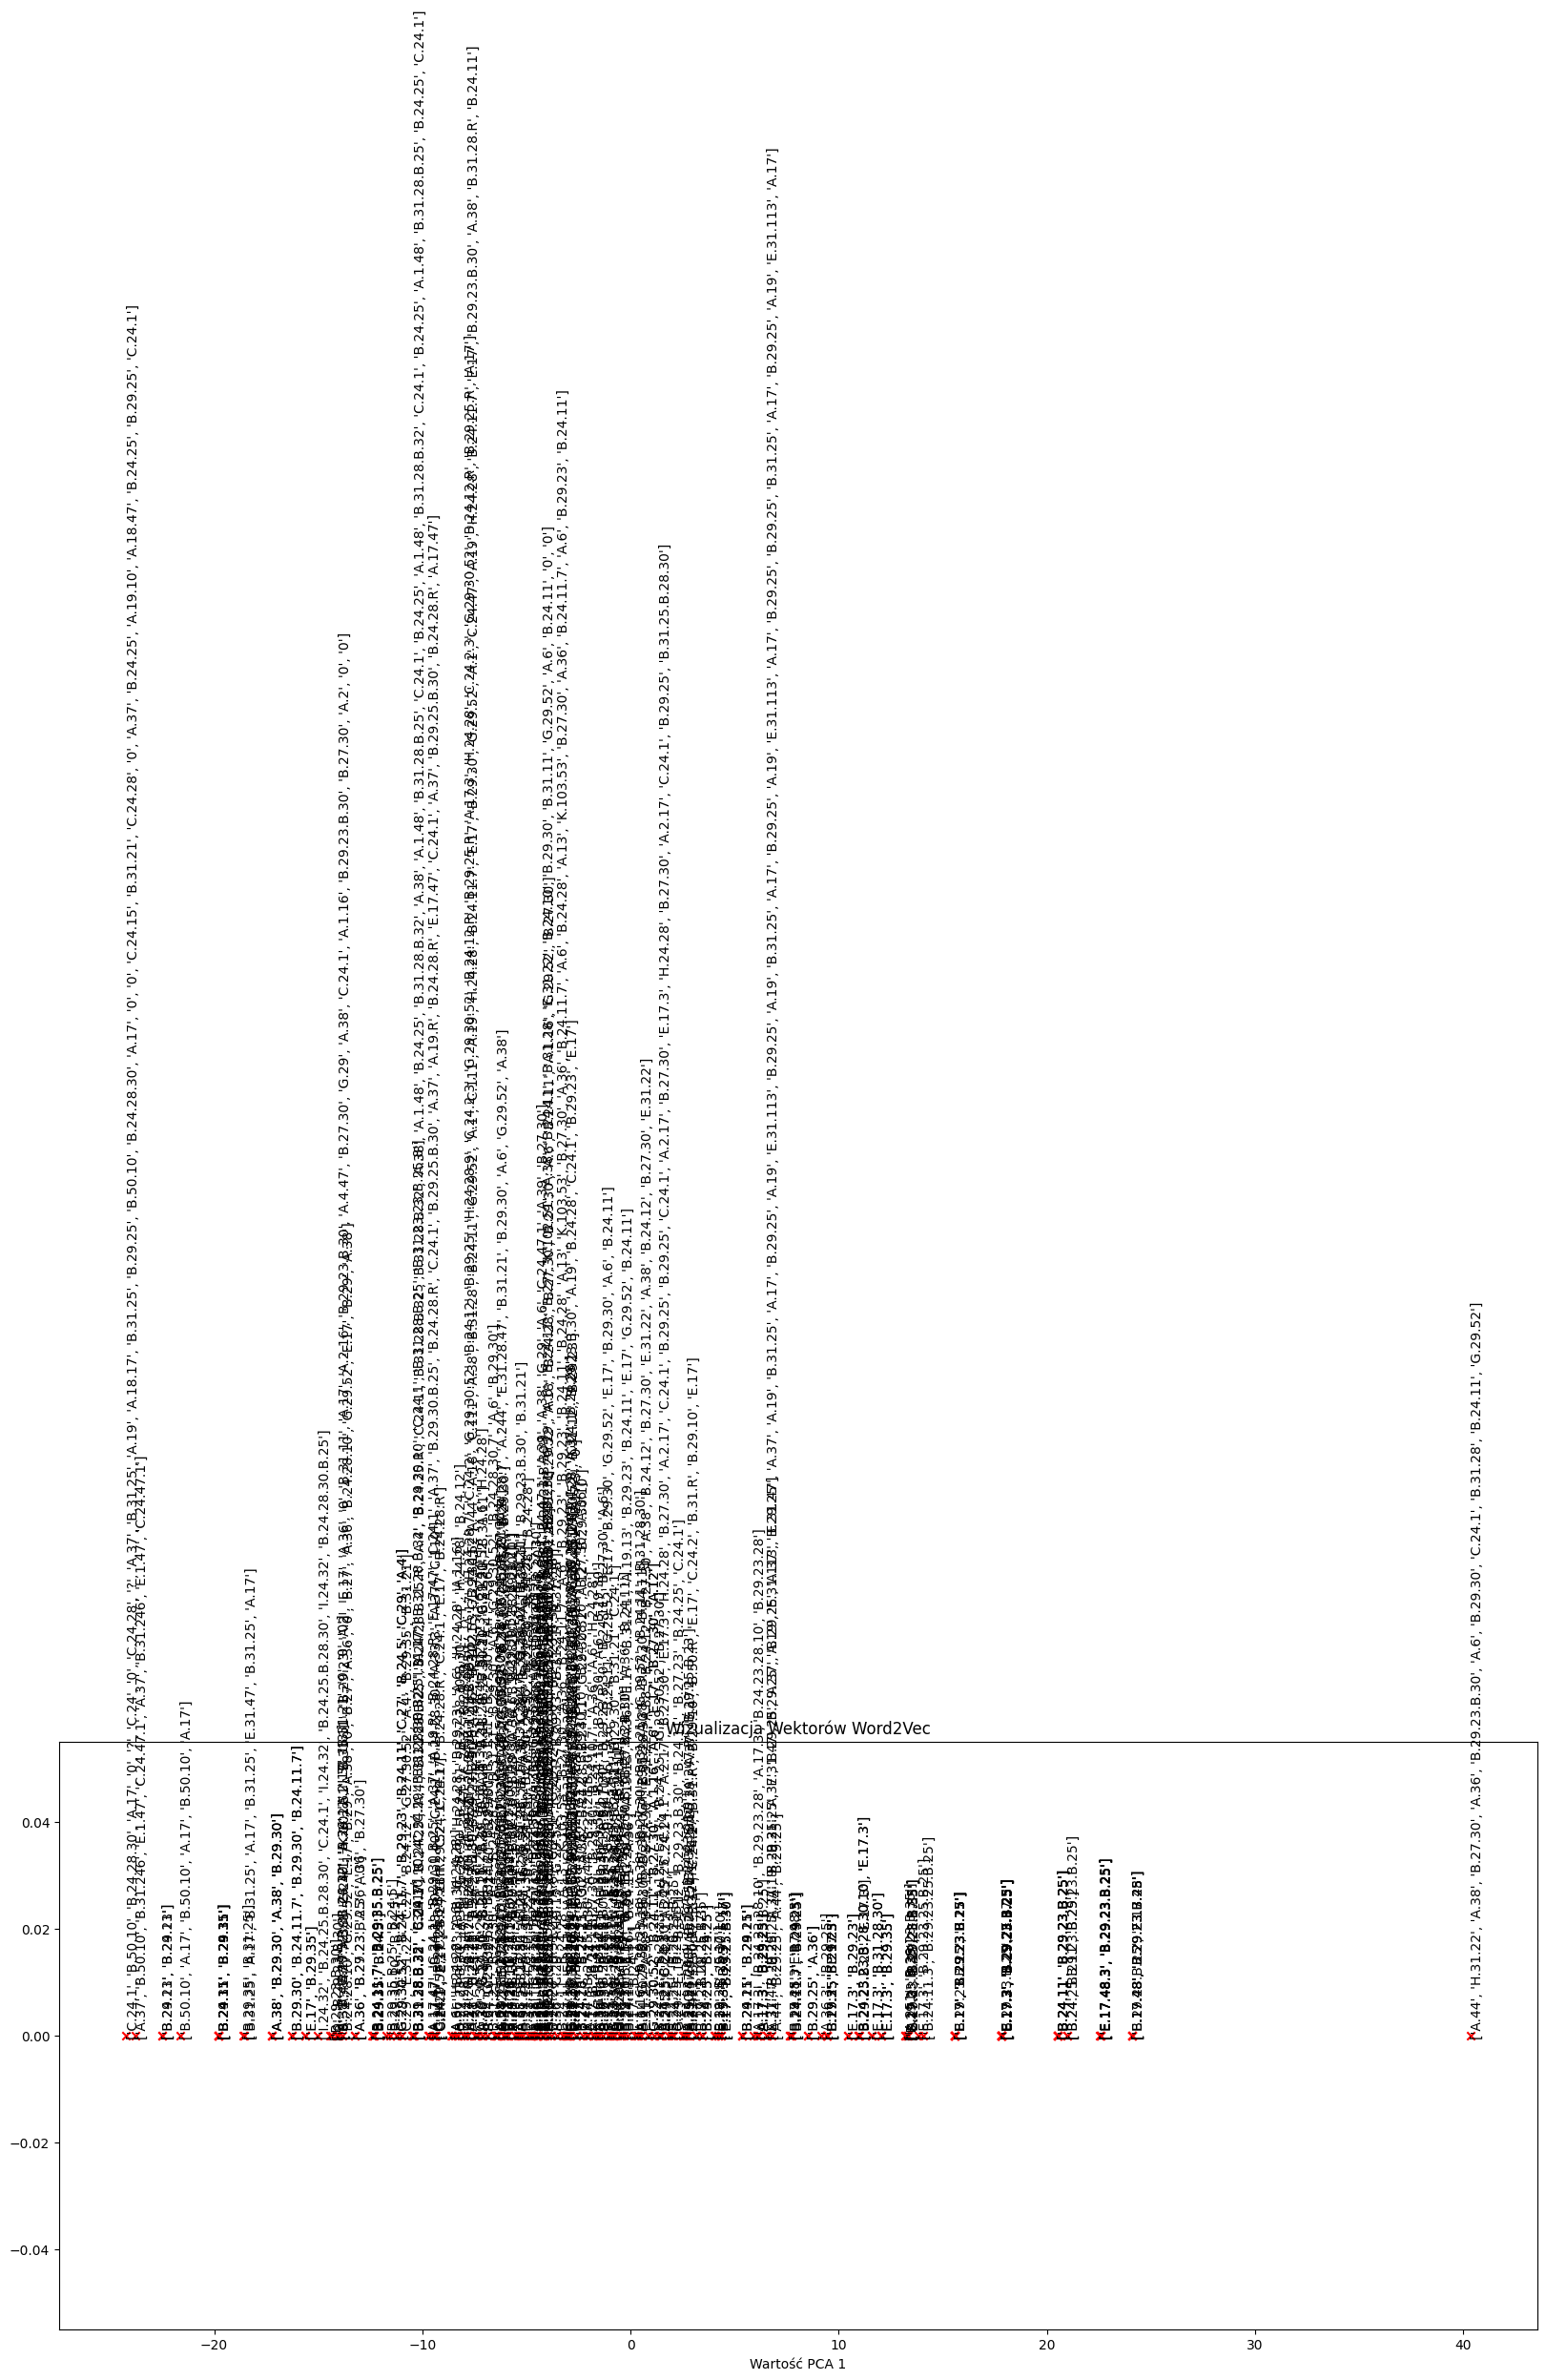

In [ ]:
first_vectors = np.array(first_embbeded)
one_dim_vectors = tsne.fit_transform(first_vectors)


plt.figure(figsize=(20, 8))
for i, name in enumerate(first_seq):
    plt.scatter(one_dim_vectors[i], 0, marker='x', color='red')
    plt.text(one_dim_vectors[i], 0, name, fontsize=10, rotation=90)

plt.title('Wizualizacja Wektorów Word2Vec')
plt.xlabel('Wartość PCA 1')
plt.show()

In [ ]:
# one hot encoding for scenes
#mydf = pd.get_dummies(df.scenes, prefix='Scenes')
from sklearn.preprocessing import MultiLabelBinarizer

mydf['scenes'] = mydf['scenes'].apply(lambda x: [] if x is None else x)

mlb = MultiLabelBinarizer(sparse_output=True)

newdf = mydf.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(mydf.pop('scenes')),
                index=mydf.index,
                columns=mlb.classes_))

newdf

,object_name,num_of_sequences,sequence_len,cycle,sequence_values,1,10,11,12,13,...,19,2,20,3,4,5,6,7,8,9
0,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BRUMC3,1,2,a,"[B.29.35, B.24.5]",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,BRUMC4,1,2,a,"[B.24.11, B.29.35]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....",1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,COLA03,1,8,,"[B.24.28.30, C.24.1, G.29.30.52, A.36, B.27.23...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,COLA06,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,COLA07,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,COLA15,1,2,a,"[B.29.25, B.24.25]",0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,COLA27,1,6,a,"[B.24.28, A.1.47, H.24.28, E.31.47, C.24.3, B....",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def toone(vector):
    out = tsne.fit_transform( np.array(vector))
    return out

In [ ]:
newdf['object_name'] = newdf['object_name'].apply(lambda x: toone(word_embedding(x, model)))
newdf['sequence_values'] = newdf['sequence_values'].apply(lambda x: toone(seq_embedding(x)))
newdf

ValueError: Expected 2D array, got 1D array instead:
array=[-0.00118799 -0.00095255  0.0054858   0.00699682 -0.00309832 -0.00490925
 -0.00017078 -0.0012852   0.00247238 -0.00471393  0.00050477 -0.00132665
  0.00135085 -0.00238872 -0.00250519  0.00170078  0.00013983  0.00026067
  0.00024834  0.00049532  0.00547242  0.00536396  0.00346568 -0.00101861
  0.00058658  0.00272099 -0.00471339 -0.00025415 -0.00222393 -0.00434424
 -0.00655843 -0.0012261   0.00224366 -0.0008765   0.00538323  0.00518595
  0.00396588  0.00201176  0.00895485 -0.00517401 -0.00373648  0.00194218
  0.00056165 -0.00475729  0.00312402  0.00186952 -0.00097647 -0.00029465
 -0.00302238  0.00042686  0.00179693  0.00432016  0.00333757  0.00186714
  0.00622302 -0.00331955  0.00167658 -0.00048398 -0.00146512 -0.00544125
 -0.0041158  -0.00608859  0.00224487 -0.00228477].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.